 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Support Vector Regression </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/05/2022

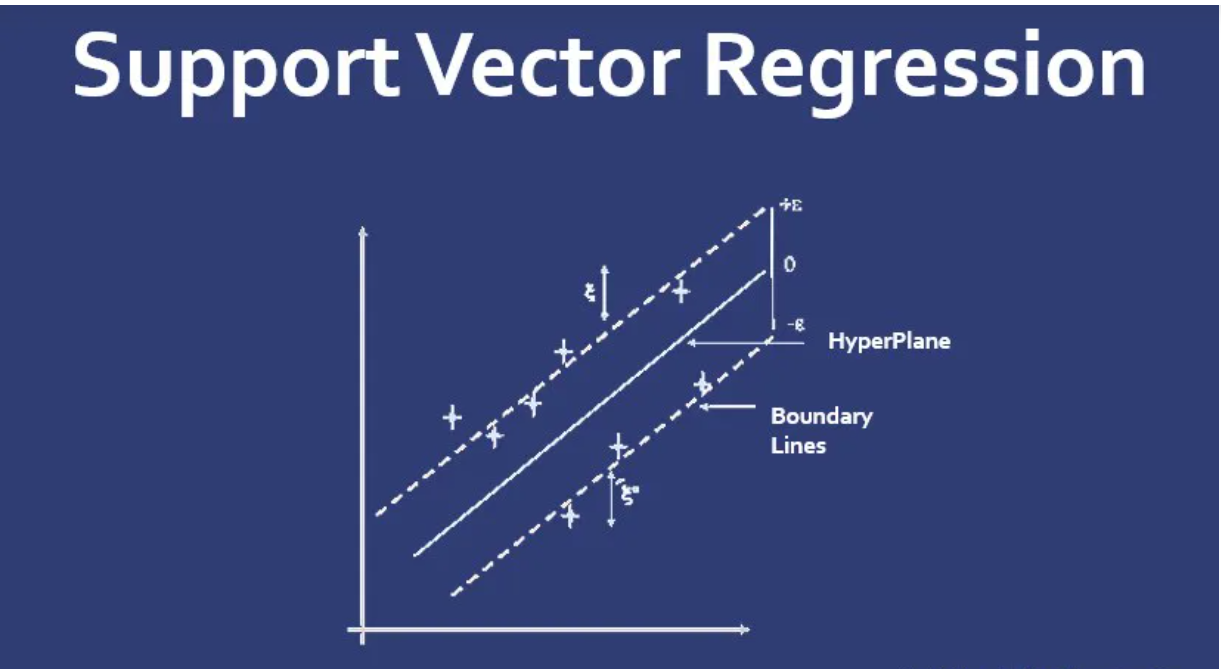

- It create a Hyperplane and try to compare the data how far or near it is from that
- It doesn't have inbuilt Scalar Technique like other regressors

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [3]:
#CSV file
df = pd.read_csv("Position_Salaries.csv")
print("Unique positions: \n",df['Position'].unique(),'\n')
print("Number of Unique positions : ",df['Position'].nunique(),'\n')
print("Unique Levels: \n",df['Level'].unique(),'\n')
print("Number of Unique Levels : ",df['Level'].nunique())
display(df.head(5))
print(df.shape)

Unique positions: 
 ['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO'] 

Number of Unique positions :  10 

Unique Levels: 
 [ 1  2  3  4  5  6  7  8  9 10] 

Number of Unique Levels :  10


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


(10, 3)


- Here we have one column as Position on Level
- We have to create a Polynomial Linear regressor that fits the data in a Parabolic line

## Checking for NULL values

In [4]:
#checking for NULL
print(df.isnull().sum()*100/df.shape[0])

Position    0.0
Level       0.0
Salary      0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the X and y varible

In [5]:
#Getting X and y variable
X = df.iloc[:,1:2].values
y =df.iloc[:,2].values

In [8]:
print("Shape of X ",X.shape)
print("\n")
print("Shape of y", y.shape)

Shape of X  (10, 1)


Shape of y (10,)


## Standard Scaler

In [10]:
ss_X = StandardScaler()
ss_y = StandardScaler()

X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y.reshape(-1,1))

Thou our data is so small we are not spliting the data into Test and Train data

In [13]:
#Creating a model object and fiting the data
reg = SVR(kernel='rbf')
reg.fit(X,y)

c:\users\kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Visualize model result

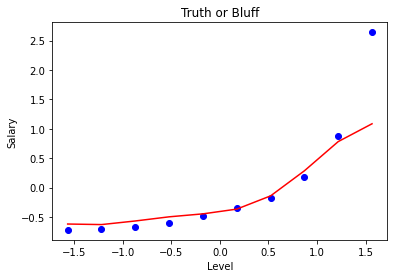

In [14]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")

# predicted values
plt.plot(X, reg.predict(X), color='r')
plt.show()

## Predicting for a value

In [19]:
#First we have transform the value into scalar level
#Second inverse tranform the value to see the original value
ss_y.inverse_transform(reg.predict(ss_X.transform(np.array([[6.5]]))))

array([252789.13921624])